In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Iris.csv")  
df.head()                                

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
df.describe() 

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape #tells us about no. of rows and column [rows , columns]

(150, 6)

In [7]:
df.drop("Id",axis=1,inplace=True)    
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Species'>

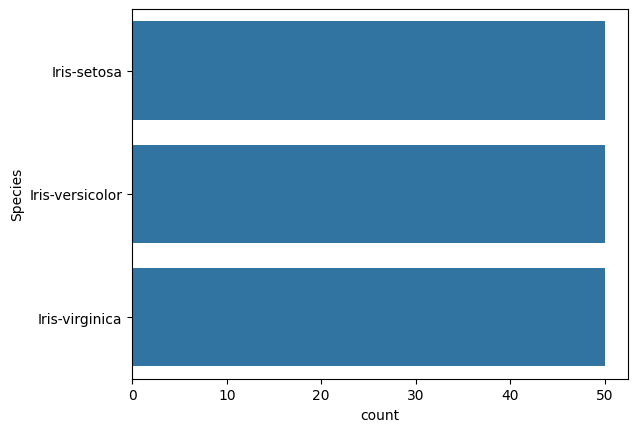

In [ ]:
print(df["Species"].value_counts())
sns.countplot(df["Species"])

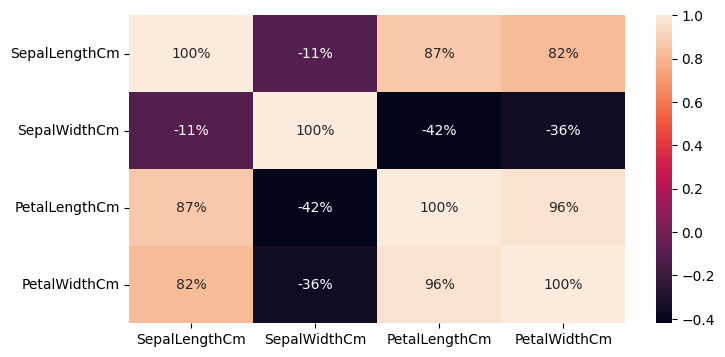

In [11]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(8,4))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".0%")
plt.show()


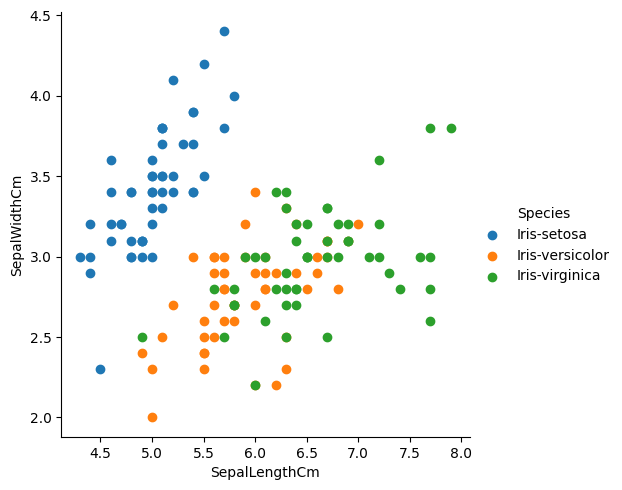

In [12]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

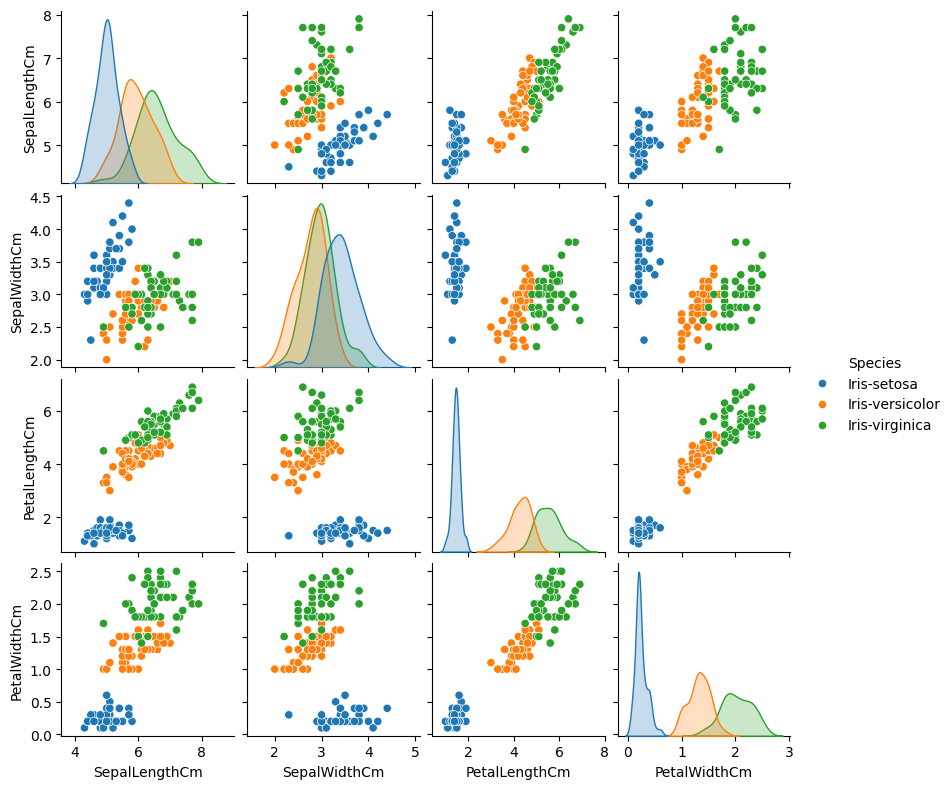

In [19]:
#let Create a pair plot of some columns 
sns.pairplot(df.iloc[:,:],hue='Species',height=2)  # graph also  tell us about the the realationship between the two columns 

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

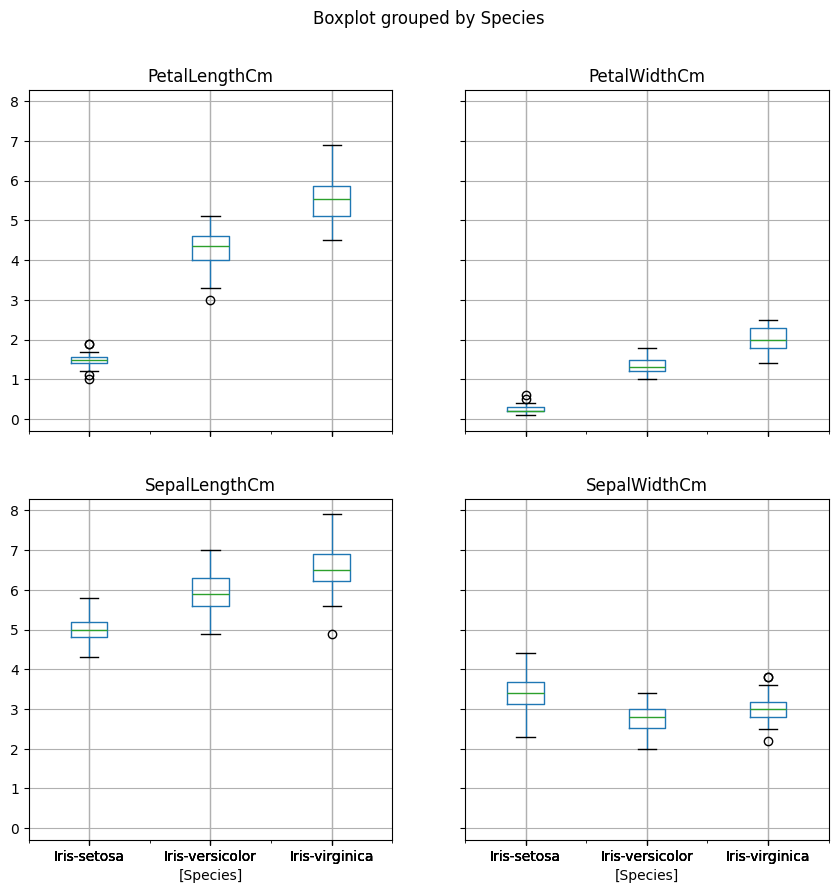

In [16]:
# We can quickly make a boxplot with Pandas on each feature split out by species
df.boxplot(by="Species", figsize=(10,10))

In [20]:
# importing alll the necessary packages to Logistic Regression 
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

### Splitting The Data into Training And Testing Dataset

In [21]:
X=df.iloc[:,0:4]
Y=df["Species"]
X.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [28]:
log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test,prediction)
#report = classification_report(Y_test, prediction, target_names=iris.target_names)

print(f"Accuracy: {accuracy:.2f}")
#print("Classification Report:\n", report)


Accuracy: 0.97


In [35]:

print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Logistic Regression is 0.9736842105263158
